In [2]:
#import libararies
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [5]:
#importing data
df_test = pd.read_csv('Smart_dataa.csv')
print (df_test)

           Crops  DateBegin  STATE  Unnamed: 3
0          Corn    1/23/2021    AL         NaN
1          Rice    8/19/2021    AL         NaN
2         Cotton    4/8/2021    AL         NaN
3       SoyBean    5/24/2021    AL         NaN
4       SoyBean    6/30/2021    AL         NaN
5           Rice   2/16/2021    AL         NaN
6       SoyBean    5/21/2021    AL         NaN
7           Rice   2/20/2021    AL         NaN
8           Corn   4/26/2021    AL         NaN
9           Rice  10/22/2021    AL         NaN
10          Corn   6/20/2021    AL         NaN
11      SoyBean     1/2/2021    AL         NaN
12        Cotton    7/3/2021    AL         NaN
13        Cotton   1/11/2021    AL         NaN
14      SoyBean   11/14/2021    MS         NaN
15        Cotton  12/12/2021    MS         NaN
16          Rice  11/26/2021    MS         NaN
17          Corn    3/5/2021    MS         NaN
18          Corn   2/27/2021    MS         NaN
19      SoyBean    6/12/2021    MS         NaN
20      SoyBe

In [6]:
#checked unknown column present and dropped it
df_test = df_test.drop(['Unnamed: 3'], axis=1)

In [7]:
#info abour the data frame
df_test.info

<bound method DataFrame.info of            Crops  DateBegin  STATE
0          Corn    1/23/2021    AL
1          Rice    8/19/2021    AL
2         Cotton    4/8/2021    AL
3       SoyBean    5/24/2021    AL
4       SoyBean    6/30/2021    AL
5           Rice   2/16/2021    AL
6       SoyBean    5/21/2021    AL
7           Rice   2/20/2021    AL
8           Corn   4/26/2021    AL
9           Rice  10/22/2021    AL
10          Corn   6/20/2021    AL
11      SoyBean     1/2/2021    AL
12        Cotton    7/3/2021    AL
13        Cotton   1/11/2021    AL
14      SoyBean   11/14/2021    MS
15        Cotton  12/12/2021    MS
16          Rice  11/26/2021    MS
17          Corn    3/5/2021    MS
18          Corn   2/27/2021    MS
19      SoyBean    6/12/2021    MS
20      SoyBean    2/13/2021    MS
21  Winter weeds    3/6/2021    MS
22          Rice  11/30/2021    MS
23      SoyBean    8/18/2021    MS
24        Cotton   1/18/2021    MS
25          Rice   8/27/2021    MS
26          Corn    1/3

In [8]:
#checkig for null values
df_test.isnull().sum()

Crops         0
DateBegin     0
STATE         0
dtype: int64

In [9]:
#print the data frame
df_test

,Crops,DateBegin,STATE
0,Corn,1/23/2021,AL
1,Rice,8/19/2021,AL
2,Cotton,4/8/2021,AL
3,SoyBean,5/24/2021,AL
4,SoyBean,6/30/2021,AL
5,Rice,2/16/2021,AL
6,SoyBean,5/21/2021,AL
7,Rice,2/20/2021,AL
8,Corn,4/26/2021,AL
9,Rice,10/22/2021,AL


In [10]:
#printing unique crops
print(df_test["Crops"].unique())

['Corn ' 'Rice ' 'Cotton' 'SoyBean ' 'Rice' 'Corn' 'Winter weeds' 'Empty ']


In [11]:
#correcting the spelling and extra space
df_test['Crops'] = df_test['Crops'].map({'Cotton':'Cotton','Corn':'Corn','Winter weeds':'Winter weeds','Rice ':'Rice','SoyBean ':'SoyBean','Corn ':'Corn','Empty  ':'Empty'}).astype(str)

In [12]:
#now printng the crops
print(df_test["Crops"].unique())

['Corn' 'Rice' 'Cotton' 'SoyBean' 'nan' 'Winter weeds']


In [13]:
#data encoding. empty as 'nan' from above
df_test['Crops'] = df_test['Crops'].map({'nan':'0', 'Cotton':'1', 'Rice':'2','Winter weeds':'3','SoyBean':'4','Corn':'5'}).astype(str)

In [14]:
#info about the data frame
df_test.info

<bound method DataFrame.info of    Crops  DateBegin  STATE
0      5   1/23/2021    AL
1      2   8/19/2021    AL
2      1    4/8/2021    AL
3      4   5/24/2021    AL
4      4   6/30/2021    AL
5      0   2/16/2021    AL
6      4   5/21/2021    AL
7      0   2/20/2021    AL
8      5   4/26/2021    AL
9      0  10/22/2021    AL
10     5   6/20/2021    AL
11     4    1/2/2021    AL
12     1    7/3/2021    AL
13     1   1/11/2021    AL
14     4  11/14/2021    MS
15     1  12/12/2021    MS
16     0  11/26/2021    MS
17     5    3/5/2021    MS
18     5   2/27/2021    MS
19     4   6/12/2021    MS
20     4   2/13/2021    MS
21     3    3/6/2021    MS
22     0  11/30/2021    MS
23     4   8/18/2021    MS
24     1   1/18/2021    MS
25     0   8/27/2021    MS
26     5    1/3/2021    MS
27     5   6/12/2021    AR
28     0   3/12/2021    AR
29     3   7/13/2021    AR
30     0    9/8/2021    AR
31     4   2/20/2021    AR
32     3   6/26/2021    AR
33     0   5/21/2021    AR
34     0    5/1/2021   

In [15]:
#converting the crops column to int
df_test['Crops'] = df_test['Crops'].astype(int)

In [16]:
#checking for null values
df_test.isnull().sum()

Crops         0
DateBegin     0
STATE         0
dtype: int64

In [17]:
#state----- check for unique
print(df_test["STATE"].unique())

['AL' 'MS' 'AR']


In [18]:
#this will give dummie values to state
states cols = pd.get_dummies(df_test['STATE'], prefix= 'STATE')
df_test[cols.columns] = cols
df_test.drop('STATE', axis = 1, inplace = True)

In [19]:
#print the data frame
df_test

,Crops,DateBegin,STATE_AL,STATE_AR,STATE_MS
0,5,1/23/2021,1,0,0
1,2,8/19/2021,1,0,0
2,1,4/8/2021,1,0,0
3,4,5/24/2021,1,0,0
4,4,6/30/2021,1,0,0
5,0,2/16/2021,1,0,0
6,4,5/21/2021,1,0,0
7,0,2/20/2021,1,0,0
8,5,4/26/2021,1,0,0
9,0,10/22/2021,1,0,0


In [20]:
#check all columns of our data frame
df_test.columns

Index(['Crops', 'DateBegin ', 'STATE_AL', 'STATE_AR', 'STATE_MS'], dtype='object')

In [21]:
#note date begin has a space , convert date in date time format
df_test['DateBegin '] = pd.to_datetime(df_test['DateBegin '])

In [22]:
#convert mm/dd/yyyy to m
df_test['Month'] = pd.to_datetime(df_test['DateBegin ']).dt.month

In [23]:
df_test

,Crops,DateBegin,STATE_AL,STATE_AR,STATE_MS,Month
0,5,2021-01-23,1,0,0,1
1,2,2021-08-19,1,0,0,8
2,1,2021-04-08,1,0,0,4
3,4,2021-05-24,1,0,0,5
4,4,2021-06-30,1,0,0,6
5,0,2021-02-16,1,0,0,2
6,4,2021-05-21,1,0,0,5
7,0,2021-02-20,1,0,0,2
8,5,2021-04-26,1,0,0,4
9,0,2021-10-22,1,0,0,10


In [24]:
#dropping date begn as we now have month column 
df_test = df_test.drop(['DateBegin '], axis=1)

In [25]:
df_test

,Crops,STATE_AL,STATE_AR,STATE_MS,Month
0,5,1,0,0,1
1,2,1,0,0,8
2,1,1,0,0,4
3,4,1,0,0,5
4,4,1,0,0,6
5,0,1,0,0,2
6,4,1,0,0,5
7,0,1,0,0,2
8,5,1,0,0,4
9,0,1,0,0,10


In [26]:
df = df_test

## KNN Classification Model

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Crops', axis = 1)
y = df['Crops']

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

In [29]:
#will train on (28,4) and test on (12,4)
print(X_train.shape)
print(X_test.shape)

(28, 4)
(12, 4)


In [30]:
k_range = range(1,10)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

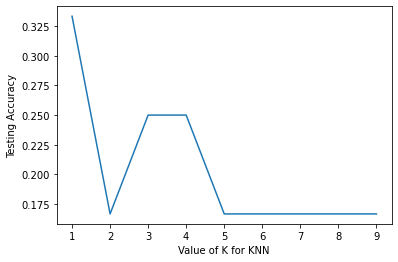

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [32]:
#check the accuracy
knn = KNeighborsClassifier(6)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.3929
Test score: 0.1667


In [33]:
#crop prediction over the month, crop 4=SoyBean in January,crop 1=cotton in April, crop 0='nan' injuly
final_test_prediction = knn.predict(X_test)
final_test_prediction

array([4, 4, 4, 1, 1, 4, 0, 0, 4, 0, 0, 0])